## Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_1 = pd.read_csv("./data/purchase_behaviour.csv")
df_2 = pd.read_csv("./data/transaction_data.csv")

## Task 1: Who are the most profitable customers ?

In [3]:
df_1.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [4]:
df_1['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

/tmp/ipykernel_563303/1064226616.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PREMIUM_CUSTOMER', data=df_1, palette='pastel')


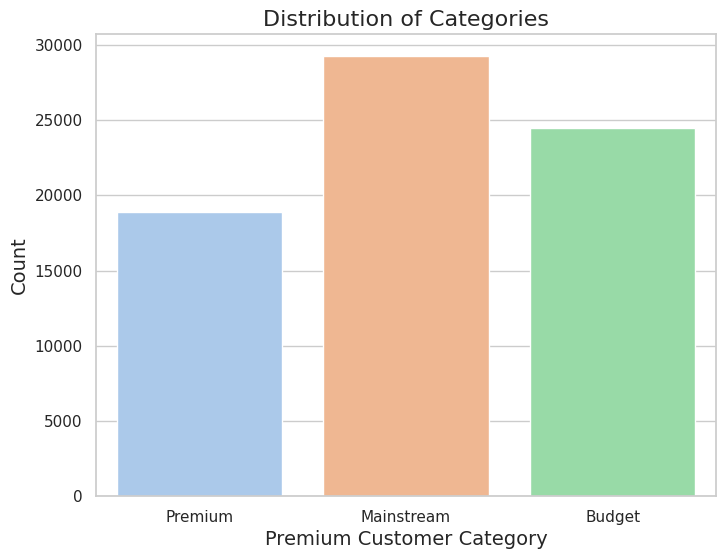

In [6]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='PREMIUM_CUSTOMER', data=df_1, palette='pastel')

plt.title('Distribution of Categories', fontsize=16)
plt.xlabel('Premium Customer Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.savefig("relationshipbtwcategoryandcount.png")

plt.show()

In [7]:
cross_tab = pd.crosstab(df_1['LIFESTAGE'], df_1['PREMIUM_CUSTOMER'])

In [8]:
cross_tab

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1504,3340,2431
NEW FAMILIES,1112,849,588
OLDER FAMILIES,4675,2831,2274
OLDER SINGLES/COUPLES,4929,4930,4750
RETIREES,4454,6479,3872
YOUNG FAMILIES,4017,2728,2433
YOUNG SINGLES/COUPLES,3779,8088,2574


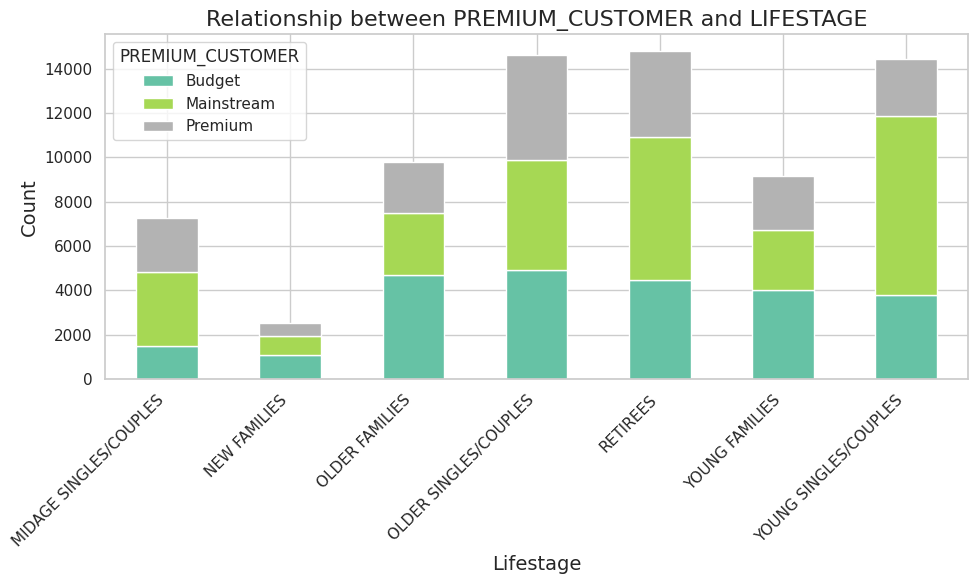

In [21]:
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Relationship between PREMIUM_CUSTOMER and LIFESTAGE', fontsize=16)
plt.xlabel('Lifestage', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.savefig("relationship_btw_premium_customer_and_lifestage.png", bbox_inches='tight')

plt.tight_layout()
plt.show()

---

From the analysis, we can conclude the following:

1. **Premium Customers**:
   - The largest proportion of **Premium** customers belongs to the **OLDER SINGLES/COUPLES** group, indicating that this lifestage is the most significant for this customer category.
   - The second-largest group of **Premium** customers is **RETIREES**, suggesting that older individuals and retirees are more likely to opt for premium offerings.

2. **Mainstream Customers**:
   - The **Mainstream** customer segment is dominated by **YOUNG SINGLES/COUPLES**, highlighting that younger individuals and couples are the primary target for mainstream products or services.

3. **Budget Customers**:
   - The majority of **Budget** customers are concentrated in the **OLDER FAMILIES**, **OLDER SINGLES/COUPLES**, and **RETIREES** lifestages. This indicates that older individuals and families are more likely to prioritize budget-friendly options.

---

### Key Observations:
- **OLDER SINGLES/COUPLES** are a significant group across all customer segments, particularly for **Premium** and **Budget** categories.
- **YOUNG SINGLES/COUPLES** are the primary drivers of the **Mainstream** segment, reflecting their preference for mid-tier offerings.
- **RETIREES** are more prominent in the **Premium** and **Budget** categories, suggesting a polarization in their purchasing behavior—either opting for premium products or seeking budget-conscious options.

---

In [11]:
df_2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


## Task 2: Top 3 Most Profitable Products and Characteristics of the most loyal customers

In [12]:
product_profitability = df_2.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Sort by total sales in descending order to find the most profitable products
product_profitability = product_profitability.sort_values(by='TOT_SALES', ascending=False)

# Display the top 3 most profitable products
top_3_products = product_profitability.head(3)
print(top_3_products)


                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40352.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


/tmp/ipykernel_563303/2910701225.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_3_products, palette='pastel')


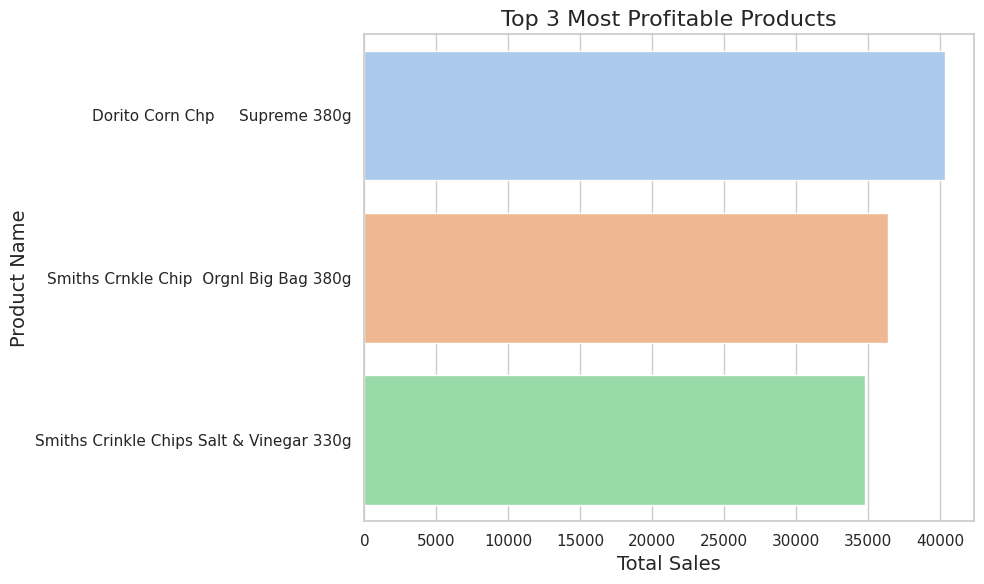

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_3_products, palette='pastel')
plt.title('Top 3 Most Profitable Products', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.savefig("top3mostprofit.png")
plt.tight_layout()
plt.show()

In [14]:
product_profitability = df_2.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
product_profitability = product_profitability.sort_values(by='TOT_SALES', ascending=False)
top_3_products = product_profitability.head(3)['PROD_NAME'].tolist()


top_3_transactions = df_2[df_2['PROD_NAME'].isin(top_3_products)]


loyalty_transaction_counts = top_3_transactions.groupby(['PROD_NAME', 'LYLTY_CARD_NBR']).size().reset_index(name='Transaction_Count')


loyalty_numbers_filtered = loyalty_transaction_counts[loyalty_transaction_counts['Transaction_Count'] > 1]


print(loyalty_numbers_filtered.columns)

Index(['PROD_NAME', 'LYLTY_CARD_NBR', 'Transaction_Count'], dtype='object')


In [15]:
df_merged = loyalty_numbers_filtered.merge(df_1, on='LYLTY_CARD_NBR')


df_lifestage = df_merged.groupby(['PROD_NAME', 'LIFESTAGE'])['Transaction_Count'].sum().reset_index()
df_premium = df_merged.groupby(['PROD_NAME', 'PREMIUM_CUSTOMER'])['Transaction_Count'].sum().reset_index()


df_lifestage_pivot = df_lifestage.pivot(index='PROD_NAME', columns='LIFESTAGE', values='Transaction_Count').fillna(0)
df_premium_pivot = df_premium.pivot(index='PROD_NAME', columns='PREMIUM_CUSTOMER', values='Transaction_Count').fillna(0)


<Figure size 1500x600 with 0 Axes>

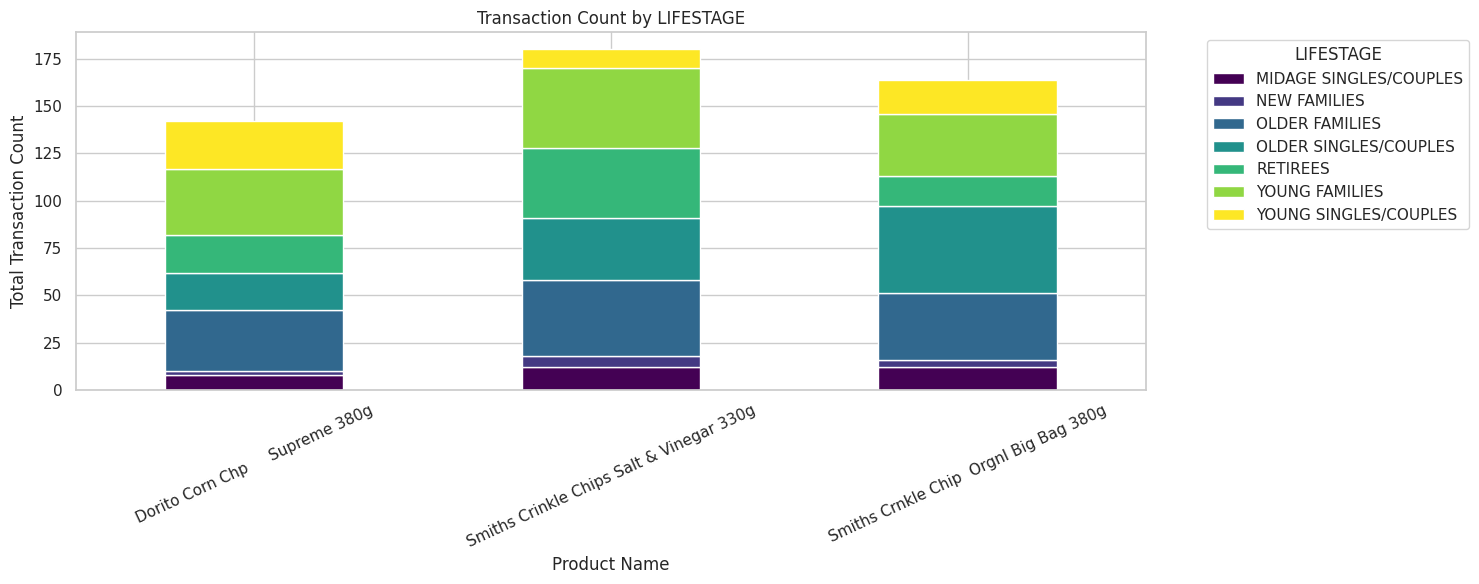

In [23]:
plt.figure(figsize=(15, 6))
df_lifestage_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 6))
plt.xlabel("Product Name")
plt.ylabel("Total Transaction Count")
plt.title("Transaction Count by LIFESTAGE")
plt.xticks(rotation=25)
plt.legend(title="LIFESTAGE", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("top3productvslifestage.png", bbox_inches='tight')
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

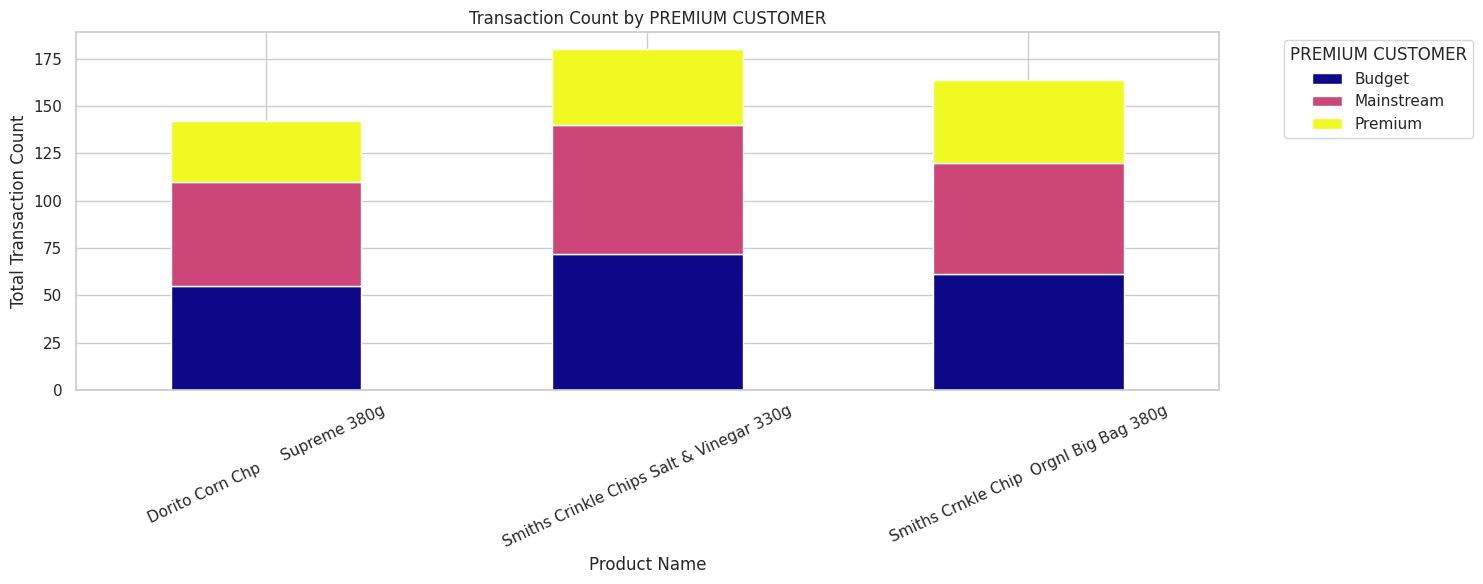

In [24]:
plt.figure(figsize=(15, 6))
df_premium_pivot.plot(kind='bar', stacked=True, colormap='plasma', figsize=(15, 6))
plt.xlabel("Product Name")
plt.ylabel("Total Transaction Count")
plt.title("Transaction Count by PREMIUM CUSTOMER")
plt.xticks(rotation=25)
plt.savefig("top3productvspremium.png",bbox_inches='tight')
plt.legend(title="PREMIUM CUSTOMER", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
df_lifestage_pivot

In [ ]:
df_premium_pivot

---

### **1. Dorito Corn Chp Supreme 380g**  
- **Premium Customer Segmentation:**  
  - The **Budget** and **Mainstream** segments contribute equally (55 transactions each), while the **Premium** segment has fewer transactions (32).  
  - This suggests that this product is **more popular among cost-conscious shoppers** rather than premium customers.  

- **Lifestage Segmentation:**  
  - The highest transactions come from **Young Families (35 transactions)** and **Older Families (32 transactions)**, indicating that this product is **favored by families with children.**  
  - Significant purchases also come from **Young Singles/Couples (25)** and **Older Singles/Couples (20)**, meaning it appeals across generations.  
  - **New Families (2 transactions)** are the least engaged with this product.  

🔍 **Key Buyer Characteristics:**  
- **Young and older families are the biggest buyers**, possibly due to shared snacking habits.  
- **Price-sensitive customers dominate purchases**, with Budget and Mainstream customers making up most of the transactions.  

---

### **2. Smiths Crinkle Chips Salt & Vinegar 330g**  
- **Premium Customer Segmentation:**  
  - Budget (72) and Mainstream (68) customers buy this product almost equally, while Premium customers (40) also contribute significantly.  
  - Compared to Doritos, **this product has more Premium customer engagement**, suggesting it has broader appeal across income levels.  

- **Lifestage Segmentation:**  
  - **Young Families (42 transactions) and Older Families (40 transactions) are the primary consumers**, reinforcing the trend that **families love this flavor.**  
  - **Older Singles/Couples (33 transactions) and Retirees (37 transactions) are also key buyers,** making this product a strong favorite among older consumers.  
  - **New Families (6 transactions) have the least interest in this product.**  

🔍 **Key Buyer Characteristics:**  
- **Appeals to all customer tiers (Budget, Mainstream, and Premium), making it a widely accepted product.**  
- **Popular among older and young families**, as well as **retirees**, indicating a preference across age groups.  

---

### **3. Smiths Crinkle Chip Original Big Bag 380g**  
- **Premium Customer Segmentation:**  
  - Budget (61) and Mainstream (59) customers dominate purchases, while Premium (44) also has strong engagement.  
  - The Premium segment purchases this product **more than the previous two chips**, showing that **it has better traction among higher-spending customers.**  

- **Lifestage Segmentation:**  
  - **Older Singles/Couples (46 transactions) make up the highest buyer group**, meaning that **this product resonates well with an older demographic.**  
  - **Older Families (35), Young Families (33), and Retirees (16) also contribute significantly.**  
  - **New Families (4 transactions) contribute the least, once again showing that newly established households do not frequently buy large chip packs.**  

🔍 **Key Buyer Characteristics:**  
- **Older consumers (Older Singles/Couples and Retirees) prefer this product,** likely due to a nostalgic connection or preference for larger packs.  
- **Has better traction among Premium customers** than the previous two products.  
- **Still maintains strong sales among Budget and Mainstream buyers.**  

---

### **Overall Characteristics of Top Buyers**
- **Budget & Mainstream Customers drive sales** across all three products, suggesting that pricing plays a crucial role in purchasing decisions.  
- **Families (both young and old) are major consumers,** reinforcing that snacks are commonly shared within households.  
- **Older Singles/Couples and Retirees engage heavily in purchasing the Smiths Crinkle Chips Original,** possibly due to an established brand preference.  
- **Premium Customers engage more with Smiths Crinkle Chip Original Big Bag 380g compared to Doritos,** which indicates that they may prefer classic, recognizable flavors over flavored variants.  